In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data/carros_limpo.csv")

In [3]:
df.head()

,Empresa,Ano,Modelo,Carro/SUV,Titulo,UsadoOuNovo,Transmissao,Motor,TipoDirecao,TipoCombustivel,ConsumoCombustivel,Quilometros,EsquemaCores,CilindrosMotor,TipoCarroceria,Portas,Bancos,Preco
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7,5595,White / Black,4,SUV,4,7,51990.0
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7,16,Black / Black,4,Hatchback,5,5,19990.0
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6,8472,Grey / White,4,Coupe,2,4,108988.0
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11.0,136517,White / Brown,8,Coupe,2,4,32990.0
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6.0,1035,Grey / Black,4,SUV,4,5,34990.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16439 entries, 0 to 16438
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Empresa             16439 non-null  object 
 1   Ano                 16439 non-null  float64
 2   Modelo              16439 non-null  object 
 3   Carro/SUV           16439 non-null  object 
 4   Titulo              16439 non-null  object 
 5   UsadoOuNovo         16439 non-null  object 
 6   Transmissao         16439 non-null  object 
 7   Motor               16439 non-null  object 
 8   TipoDirecao         16439 non-null  object 
 9   TipoCombustivel     16439 non-null  object 
 10  ConsumoCombustivel  16439 non-null  float64
 11  Quilometros         16439 non-null  object 
 12  EsquemaCores        16439 non-null  object 
 13  CilindrosMotor      16439 non-null  int64  
 14  TipoCarroceria      16439 non-null  object 
 15  Portas              16439 non-null  int64  
 16  Banc

In [5]:
df.isnull().sum()

Empresa               0
Ano                   0
Modelo                0
Carro/SUV             0
Titulo                0
UsadoOuNovo           0
Transmissao           0
Motor                 0
TipoDirecao           0
TipoCombustivel       0
ConsumoCombustivel    0
Quilometros           0
EsquemaCores          0
CilindrosMotor        0
TipoCarroceria        0
Portas                0
Bancos                0
Preco                 0
dtype: int64

In [6]:
df.shape

(16439, 18)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ano,16439.0,2016.287791,5.148137,1959.0,2013.0,2017.000000,2020.0,2023.0
ConsumoCombustivel,16439.0,7.665814,2.220980,0.0,6.6,7.663151,8.6,27.0
CilindrosMotor,16439.0,4.049821,1.632649,0.0,4.0,4.000000,4.0,12.0
Portas,16439.0,3.688728,1.287587,0.0,4.0,4.000000,4.0,12.0
Bancos,16439.0,4.660320,1.789630,0.0,5.0,5.000000,5.0,22.0
Preco,16439.0,37290.852278,37110.240414,88.0,18999.0,29690.000000,43990.0,1500000.0


##### Correlações

In [8]:
colunas_numericas = [col for col in df if df[col].dtype in ['int64', 'float64']] 
colunas_categoricas = [col for col in df if df[col].dtype in ['object']] 

In [9]:
sns.set_style('darkgrid')

In [10]:
colunas_numericas

['Ano', 'ConsumoCombustivel', 'CilindrosMotor', 'Portas', 'Bancos', 'Preco']

In [11]:
colunas_categoricas

for coluna in colunas_categoricas:
    print(f"Coluna: {coluna} / Valores: {df[coluna].nunique()}")

Coluna: Empresa / Valores: 72
Coluna: Modelo / Valores: 764
Coluna: Carro/SUV / Valores: 617
Coluna: Titulo / Valores: 8581
Coluna: UsadoOuNovo / Valores: 3
Coluna: Transmissao / Valores: 3
Coluna: Motor / Valores: 105
Coluna: TipoDirecao / Valores: 5
Coluna: TipoCombustivel / Valores: 9
Coluna: Quilometros / Valores: 14037
Coluna: EsquemaCores / Valores: 807
Coluna: TipoCarroceria / Valores: 10


In [12]:
df_enc = pd.read_csv("data/carros_codificado.csv")

In [13]:
corr_matrix = df_enc.corr()
corr_matrix

,Empresa,Ano,Modelo,Carro/SUV,Titulo,UsadoOuNovo,Transmissao,Motor,TipoDirecao,TipoCombustivel,ConsumoCombustivel,Quilometros,EsquemaCores,CilindrosMotor,TipoCarroceria,Portas,Bancos,Preco
Empresa,1.000000,0.070340,0.549088,0.281311,0.074891,-0.095359,-0.066511,0.244653,0.064150,-0.158023,-0.094641,0.238772,0.205899,0.119349,-0.079856,-0.092873,-0.093860,0.407087
Ano,0.070340,1.000000,0.143170,0.244559,-0.072510,-0.388155,-0.220876,0.049263,-0.110621,-0.087797,-0.265625,0.270702,0.174302,-0.073520,0.004967,0.097407,0.079803,0.360367
Modelo,0.549088,0.143170,1.000000,0.252014,0.089216,-0.111079,-0.033762,0.365006,-0.195220,-0.349142,0.095672,0.110508,0.099503,0.152982,0.120810,-0.146162,0.014039,0.372996
Carro/SUV,0.281311,0.244559,0.252014,1.000000,0.085454,-0.441261,-0.014987,0.151392,0.038557,-0.182596,-0.059865,0.817558,0.443755,0.014702,0.025176,-0.274478,-0.131020,0.385007
Titulo,0.074891,-0.072510,0.089216,0.085454,1.000000,-0.034620,0.040335,0.040138,-0.053119,-0.125899,0.036140,0.022991,0.016834,0.003228,0.107605,-0.047117,-0.023958,0.049065
UsadoOuNovo,-0.095359,-0.388155,-0.111079,-0.441261,-0.034620,1.000000,0.089393,-0.011038,0.006540,0.058296,0.113421,-0.444620,-0.205461,0.084255,-0.015771,0.054950,0.043329,-0.254921
Transmissao,-0.066511,-0.220876,-0.033762,-0.014987,0.040335,0.089393,1.000000,-0.015234,-0.009016,-0.050935,0.027116,0.016759,-0.027662,0.083108,-0.031835,-0.007006,-0.044931,-0.083359
Motor,0.244653,0.049263,0.365006,0.151392,0.040138,-0.011038,-0.015234,1.000000,-0.061858,-0.186901,0.187702,0.052293,0.087416,0.226525,0.097666,-0.145832,-0.061906,0.424683
TipoDirecao,0.064150,-0.110621,-0.195220,0.038557,-0.053119,0.006540,-0.009016,-0.061858,1.000000,0.250256,-0.052121,0.053384,0.019601,-0.166954,-0.206056,-0.302519,-0.381957,-0.035924
TipoCombustivel,-0.158023,-0.087797,-0.349142,-0.182596,-0.125899,0.058296,-0.050935,-0.186901,0.250256,1.000000,0.132135,-0.117004,-0.013088,0.071090,-0.188422,0.132544,0.051297,-0.155429


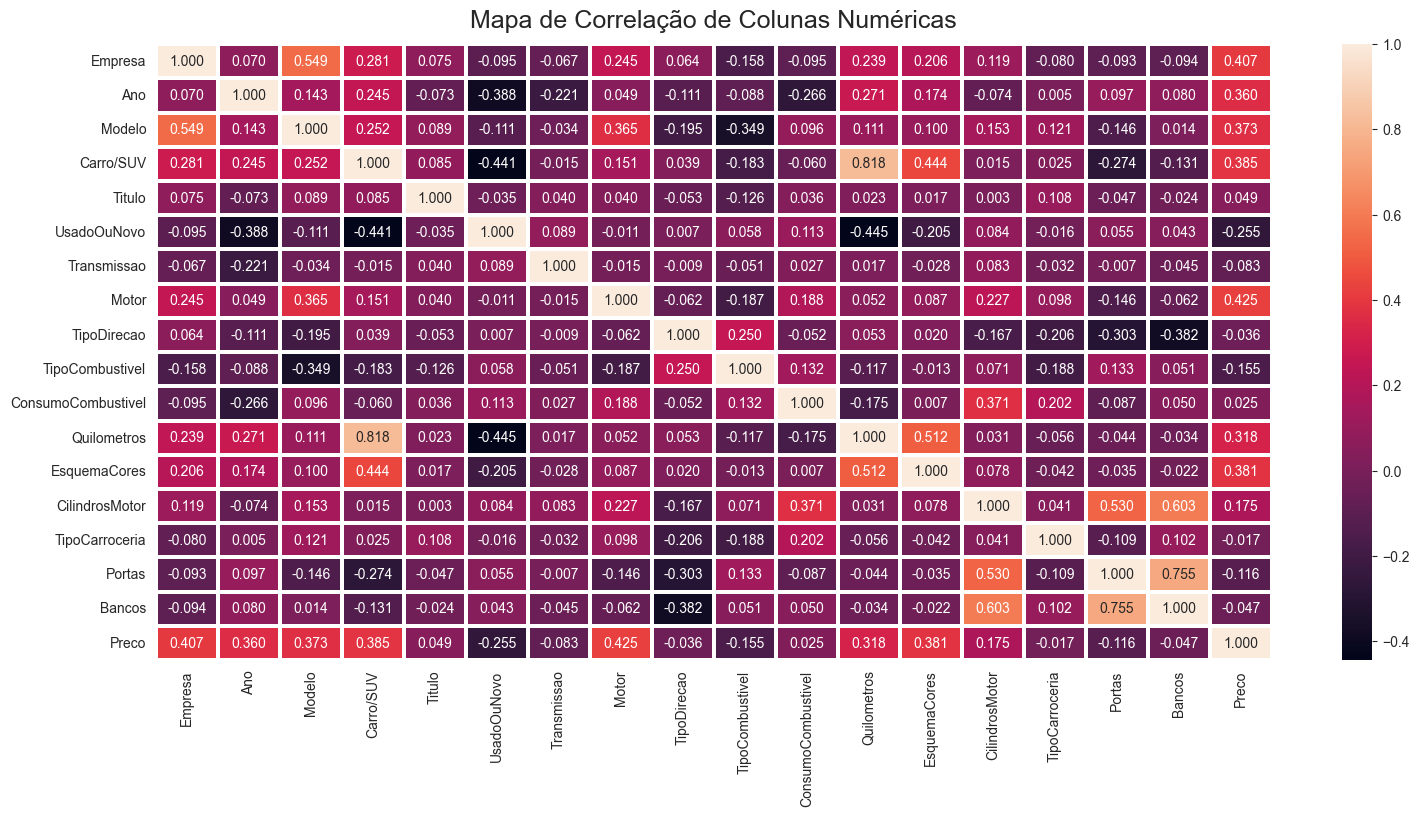

In [14]:
plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', linewidths=1.5)
plt.title('Mapa de Correlação de Colunas Numéricas', fontdict={'fontsize': 18}, pad=12)
plt.show()

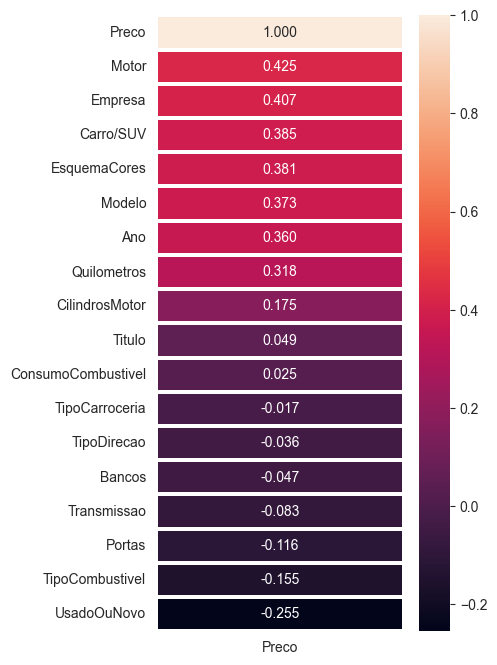

In [15]:
plt.figure(figsize=(4, 8))
sns.heatmap(corr_matrix[['Preco']].sort_values(by='Preco', ascending=False), annot=True, fmt='.3f', linewidths=1.5)
plt.show()